# 课后作业：数据预处理、降维、特征提取及聚类

<font color="blue">作者：欧新宇（Xinyu OU）</font>

<font color="red">本文档所展示的测试结果，均运行于：Intel Core i7-7700K CPU 4.2GHz</font>

**【作业提交】**

将分类结果保存到文本文档进行提交(写上每一题的题号和题目，然后再贴答案)，同时提交源代码。
1. 测试结果命名为: ex09-结果-你的学号-你的姓名.txt
2. 输出图片命名为: ex09-性能对比图-你的学号-你的姓名.png (.jpg)
3. 源代码命名为: 
- ex09-01Ori-你的学号-你的姓名.py
- ex09-02Preprocessing-你的学号-你的姓名.py
- ex09-03PCA-你的学号-你的姓名.py

<font color="red">*结果文件，要求每小题标注题号，两题之间要求空一行*</font>
___

要求在 "MNIST人脸识别" 数据集上完成以下任务，要求如下：
1. 要求使用原始数据集的10%完成以下习题。（已给出载入数据集和数据预处理 I部分的代码）
2. 使用MLP模型进行训练和测试，基本参数设置为：

```python
solver='lbfgs', hidden_layer_sizes=[100, 100], activation='relu', alpha=1e-5, random_state=62,
```
3. 使用原始数据进行预测（ex09-01Ori）
4. 测试六种预处理方向对性能的影响（ex09-02Preprocessing）

```python
methods = ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler',  'RobustScaler', 'Normalizer', 'Binarizer']
```

> 在完成了六种预处理方法的性能输出后，对比预处理结果和原始数据的结果，从7种结果中选出性能最好的一种方法完成后续的实验。

5. 使用PCA进行降维，并测试性能，要求测试PCA的参数范围为n_components = [0.4:0.99]，可以使用以下代码设置pca的参数范围（ex09-03PCA，ex09-性能对比图）

```python
num=20
scores = np.zeros([3,num]) 
scores[0,:] = np.linspace(0.40, 0.99, num)
```

6. 可视化出PCA的性能曲线（ex09-03PCA，ex09-性能对比图）
7. （选做）可视化出PCA曲线中最大值的点，以及未进行PCA降维的性能值点（ex09-03PCA，ex09-性能对比图）

### 1. 载入MNIST数据集

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'Modules'))
import load_MNIST

import time
start = time.time()

train_images = load_MNIST.load_train_images()
train_labels = load_MNIST.load_train_labels()
test_images = load_MNIST.load_test_images()
test_labels = load_MNIST.load_test_labels()

print("载入数据集共耗时: {:.3f}s".format(time.time() - start))

开始载入MNIST手写数字数据集：
 训练集图片大小: 28*28, 已载入60000/60000.
训练集标签数量: 60000...已完成。
 测试集图片大小: 28*28, 已载入10000/10000.
测试集标签数量: 10000...已完成。
载入数据集共耗时: 2.788s


### 2. 数据预处理 I
1. 将图像数据转换成二维矩阵，并归一化到 $0-1$ 之间

In [2]:
# 标准调整形态的方法
# X_train = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])/255
# 此处，因为我们已经知道的样本的形态，所以可以直接书写值

X_train = train_images.reshape(60000, 28*28)/255
y_train = train_labels
X_test = test_images.reshape(10000, 28*28)/255
y_test = test_labels

2. 为了加速运算，将样本缩减到10%的比例进行处理

In [3]:
# 为了提高训练速度，我们只提取10%的样本进行演示
X_train_lite = X_train[0:5999,:]
y_train_lite = y_train[0:5999]
X_test_lite = X_test[0:999,:]
y_test_lite = y_test[0:999]

### 3. 使用原始数据进行预测

In [4]:
# 导入多层感知机MLP神经网络
from sklearn.neural_network import MLPClassifier
import time

start = time.time()

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100, 100], activation='relu', alpha=1e-5, random_state=62, verbose=2)
mlp.fit(X_train_lite, y_train_lite)

score_ori_train = mlp.score(X_train_lite, y_train_lite)
score_ori_test = mlp.score(X_test_lite, y_test_lite)

print('训练结束，用时{:.2f}s.'.format(time.time() - start))
print('训练集得分: {:.4f}, 测试集得分: {:.4f}'.format(mlp.score(X_train_lite, y_train_lite), mlp.score(X_test_lite, y_test_lite)))

训练结束，用时5.72s.
训练集得分: 1.0000, 测试集得分: 0.9239


### 4. 测试预处理对性能的影响

In [5]:
# 导入preprocessing预处理器
from sklearn import preprocessing

methods = ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler', 
           'RobustScaler', 'Normalizer', 'Binarizer']

for str in methods:
    scaler = eval('preprocessing.' + str + '().fit(X_train_lite)')
    X_train_scaled = scaler.transform(X_train_lite)
    X_test_scaled = scaler.transform(X_test_lite)
    mlp.fit(X_train_scaled, y_train_lite)
    print('预处理方法: {}, 测试集得分: {:.4f}'
          .format(str, mlp.score(X_test_scaled,y_test_lite)))

预处理方法: StandardScaler, 测试集得分: 0.9199
预处理方法: MinMaxScaler, 测试集得分: 0.9219
预处理方法: MaxAbsScaler, 测试集得分: 0.9219
预处理方法: RobustScaler, 测试集得分: 0.9059
预处理方法: Normalizer, 测试集得分: 0.9239
预处理方法: Binarizer, 测试集得分: 0.9139


**【小结】**

从以上结果来看，六种预处理方法都不如未经过预处理的结果。因此，后续的实验我们将继续采用未经过预处理数据完成。

### 5. 使用PCA进行降维，并测试性能

In [6]:
from sklearn.decomposition import PCA# 导入多层感知机MLP神经网络

#设置主成分数量为2以便我们进行可视化
pca = PCA(n_components=0.9)
pca.fit(X_train_lite)
X_train_pca = pca.transform(X_train_lite)
X_test_pca = pca.transform(X_test_lite)
print(X_train_lite.shape, X_test_lite.shape)
print(X_train_pca.shape, X_test_pca.shape)

(5999, 784) (999, 784)
(5999, 84) (999, 84)


In [7]:
from sklearn.neural_network import MLPClassifier
import time

start = time.time()

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100, 100], activation='relu', alpha=1e-5, random_state=62, verbose=2)
mlp.fit(X_train_pca, y_train_lite)

score_train = mlp.score(X_train_pca, y_train_lite)
score_test = mlp.score(X_test_pca, y_test_lite)

print('训练结束，用时{:.2f}s.'.format(time.time() - start))
print('训练集得分: {:.4f}, 测试集得分: {:.4f}'.format(score_train, score_test))

训练结束，用时1.39s.
训练集得分: 1.0000, 测试集得分: 0.9309


### 6. 按要求计算范围内的PCA降维后的性能

In [8]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import time

num=20
scores = np.zeros([3,num]) 
scores[0,:] = np.linspace(0.40, 0.99, num)

start = time.time()

# 基于信息量百分比
n = 0    
for i in scores[0,:]:
# TODO: 3. 进行PCA降维
    pca = PCA(n_components = i)
    pca.fit(X_train_lite)
    X_train_pca = pca.transform(X_train_lite)
    X_test_pca = pca.transform(X_test_lite)

    # TODO: 4.训练MLP模型
    mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100, 100], activation='relu', alpha=1e-5, random_state=62, verbose=2)
    mlp.fit(X_train_pca, y_train_lite)
    
    score_train = mlp.score(X_train_pca, y_train_lite)
    score_test = mlp.score(X_test_pca, y_test_lite)
    scores[1, n] = score_train
    scores[2, n] = score_test
    
    t = time.time() - start
    print("n_components={0:.2f}: 训练集得分 {1:.4f}，测试集得分 {2:.4f}，t = {3:.2f}".format(i, score_train, score_test, t))

    n = n + 1


n_components=0.40: 训练集得分 0.9948，测试集得分 0.8368，t = 7.12
n_components=0.43: 训练集得分 1.0000，测试集得分 0.8519，t = 13.99
n_components=0.46: 训练集得分 1.0000，测试集得分 0.8689，t = 20.57
n_components=0.49: 训练集得分 1.0000，测试集得分 0.8899，t = 26.59
n_components=0.52: 训练集得分 1.0000，测试集得分 0.8989，t = 30.50
n_components=0.56: 训练集得分 1.0000，测试集得分 0.9119，t = 33.75
n_components=0.59: 训练集得分 1.0000，测试集得分 0.9109，t = 36.63
n_components=0.62: 训练集得分 1.0000，测试集得分 0.9219，t = 39.38
n_components=0.65: 训练集得分 1.0000，测试集得分 0.9269，t = 41.85
n_components=0.68: 训练集得分 1.0000，测试集得分 0.9229，t = 44.80
n_components=0.71: 训练集得分 1.0000，测试集得分 0.9389，t = 47.59
n_components=0.74: 训练集得分 1.0000，测试集得分 0.9269，t = 49.92
n_components=0.77: 训练集得分 1.0000，测试集得分 0.9359，t = 52.23
n_components=0.80: 训练集得分 1.0000，测试集得分 0.9289，t = 54.58
n_components=0.83: 训练集得分 1.0000，测试集得分 0.9309，t = 56.64
n_components=0.87: 训练集得分 1.0000，测试集得分 0.9259，t = 58.68
n_components=0.90: 训练集得分 1.0000，测试集得分 0.9269，t = 60.74
n_components=0.93: 训练集得分 1.0000，测试集得分 0.9259，t = 62.83
n_component

### 7.可视化性能

Text(1.01, 0.9239, '0.9239')

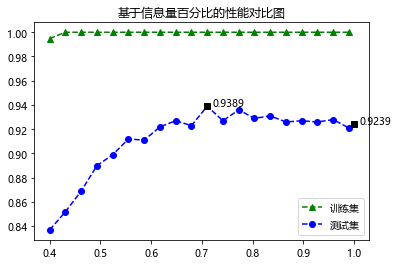

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']

plt.plot(scores[0,:], scores[1,:], 'g--^', label='训练集（信息量）')
plt.plot(scores[0,:], scores[2,:], 'b--o', label='测试集（信息量）')
plt.legend(['训练集', '测试集'], loc='best')
plt.title('基于信息量百分比的性能对比图')

max_y = np.round(np.max(scores[2,:]), 4)
max_index = np.where(scores[2,:]==np.max(scores[2,:]))
max_x = scores[0, max_index]

score_ori_test_y = np.round(score_ori_test, 4)
score_ori_text_x = 1

plt.plot(max_x, max_y, 'ks')
plt.annotate(max_y, 
             xy = (max_x, max_y), 
             xytext = (max_x+0.01, max_y))
plt.plot(score_ori_text_x, score_ori_test_y, 'ks')
plt.annotate(score_ori_test_y, 
             xy = (score_ori_text_x, score_ori_test_y), 
             xytext = (score_ori_text_x+0.01, score_ori_test_y))
plt.show()